In [3]:
import numpy as np

from DataHandler.SINMOD import SINMOD
from usr_func import *
FILEPATH = "/Users/yaoling/OneDrive - NTNU/MASCOT_PhD/Data/Nidelva/"
FIGPATH = "/Users/yaoling/OneDrive - NTNU/MASCOT_PhD/Projects/MAFIA/EDA/fig/"
data_auv = pd.read_csv(FILEPATH + "May27/AUVData.csv")


ModuleNotFoundError: No module named '_tkinter'

In [ ]:
lat_auv = data_auv['lat'].to_numpy()
lon_auv = data_auv['lon'].to_numpy()
depth_auv = data_auv['depth'].to_numpy()

coordinates_auv = np.vstack((lat_auv, lon_auv, depth_auv)).T
salinity_auv = data_auv['salinity'].to_numpy()

sinmod = SINMOD()
filenames_fullpath = ["/Users/yaoling/OneDrive - NTNU/MASCOT_PhD/Data/Nidelva/SINMOD_DATA/samples_2021.05.27.nc"]
sinmod.load_sinmod_data(raw_data=True, filenames=filenames_fullpath)
sinmod.get_data_at_coordinates(coordinates_auv, filename="/Users/yaoling/OneDrive - NTNU/MASCOT_PhD/Projects/MAFIA/EDA/sinmod.csv")

/Users/yaoling/OneDrive - NTNU/MASCOT_PhD/Data/Nidelva/SINMOD_DATA/samples_2021.05.27.nc
2021.05.27
Time consumed:  1.668989896774292
Start interpolating...
Finished data reorganising... Time consumed:  0.3041079044342041
Coordinates shape:  (11812, 3)
Distance matrix - x finished, time consumed:  77.59237599372864
Distance matrix - y finished, time consumed:  97.05144882202148


In [21]:
fig = go.Figure(data=[go.Scatter3d(
    x=lon_auv,
    y=lat_auv,
    z=-depth_auv,
    mode='markers',
    marker=dict(
        size=12,
        color=salinity_auv,                # set color to an array/list of desired values
        colorscale='BrBG',   # choose a colorscale
        opacity=0.8
    )
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
plotly.offline.plot(fig, filename=FIGPATH+"data_auv.html", auto_open=False)
os.system('open -a \"Google Chrome\" /Users/yaoling/OneDrive\ -\ NTNU/MASCOT_PhD/Projects/MAFIA/EDA/fig/data_auv.html')


0

In [8]:
data_sinmod = pd.read_csv("/Users/yaoling/OneDrive - NTNU/MASCOT_PhD/Projects/MAFIA/EDA/sinmod.csv").to_numpy()

In [9]:
data_sinmod
fig = go.Figure(data=[go.Scatter3d(
    x=data_sinmod[:, 1],
    y=data_sinmod[:, 0],
    z=-data_sinmod[:, 2],
    mode='markers',
    marker=dict(
        size=12,
        color=data_sinmod[:, 3],                # set color to an array/list of desired values
        colorscale='BrBG',   # choose a colorscale
        opacity=0.8
    )
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
plotly.offline.plot(fig, filename=FIGPATH+"data_sinmod.html", auto_open=False)
os.system('open -a \"Google Chrome\" /Users/yaoling/OneDrive\ -\ NTNU/MASCOT_PhD/Projects/MAFIA/EDA/fig/data_sinmod.html')

0

In [10]:
import gstools as gs
dim = 3
angles = [np.deg2rad(0), np.deg2rad(0), np.deg2rad(0)]
model = gs.Gaussian(dim=3, len_scale=[16, 8, 4], angles=angles)
x = y = z = range(50)
pos = (x, y, z)
srf = gs.SRF(model, seed=1001)
field = srf.structured(pos)
# All 3 axes of the rotated coordinate-system
main_axes = gs.rotated_main_axes(dim, angles)
axis1, axis2, axis3 = main_axes



In [11]:
bin_center, dir_vario, counts = gs.vario_estimate(
    pos,
    field,
    direction=main_axes,
    bandwidth=10,
    sampling_size=2000,
    sampling_seed=1001,
    mesh_type="structured",
    return_counts=True,
)


In [12]:
print("Original:")
print(model)
model.fit_variogram(bin_center, dir_vario)
print("Fitted:")
print(model)


Original:
Gaussian(dim=3, var=1.0, len_scale=16.0, nugget=0.0, anis=[0.5, 0.25])
Fitted:
Gaussian(dim=3, var=0.84, len_scale=12.2, nugget=2.56e-05, anis=[0.532, 0.359])


/Users/yaoling/Library/Python/3.9/lib/python/site-packages/gstools/covmodel/plot.py:202: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.

/Users/yaoling/Library/Python/3.9/lib/python/site-packages/gstools/covmodel/plot.py:202: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.

/Users/yaoling/Library/Python/3.9/lib/python/site-packages/gstools/covmodel/plot.py:202: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



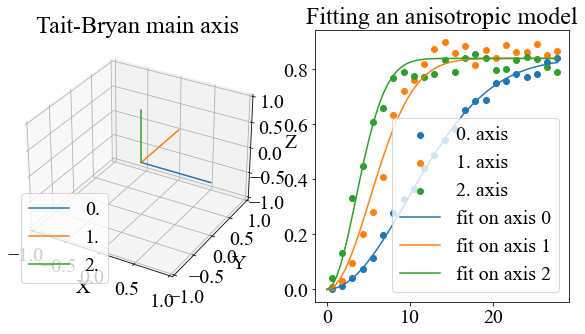

In [13]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=[10, 5])
ax1 = fig.add_subplot(121, projection=Axes3D.name)
ax2 = fig.add_subplot(122)

ax1.plot([0, axis1[0]], [0, axis1[1]], [0, axis1[2]], label="0.")
ax1.plot([0, axis2[0]], [0, axis2[1]], [0, axis2[2]], label="1.")
ax1.plot([0, axis3[0]], [0, axis3[1]], [0, axis3[2]], label="2.")
ax1.set_xlim(-1, 1)
ax1.set_ylim(-1, 1)
ax1.set_zlim(-1, 1)
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("Z")
ax1.set_title("Tait-Bryan main axis")
ax1.legend(loc="lower left")

x_max = max(bin_center)
ax2.scatter(bin_center, dir_vario[0], label="0. axis")
ax2.scatter(bin_center, dir_vario[1], label="1. axis")
ax2.scatter(bin_center, dir_vario[2], label="2. axis")
model.plot("vario_axis", axis=0, ax=ax2, x_max=x_max, label="fit on axis 0")
model.plot("vario_axis", axis=1, ax=ax2, x_max=x_max, label="fit on axis 1")
model.plot("vario_axis", axis=2, ax=ax2, x_max=x_max, label="fit on axis 2")
ax2.set_title("Fitting an anisotropic model")
ax2.legend()

plt.show()
